In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
import os
import nltk

# DataSet 
Link: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
There are three datasets available for us:


1.Books
2.Users
3.Ratings


In [3]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')
display(books.head())
display(ratings.head())
display(users.head())

C:\Users\HARSHIT GOYAL\AppData\Local\Temp\ipykernel_6604\3250565520.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
display(books.shape)
display(ratings.shape)
display(users.shape)

(271360, 8)

(1149780, 3)

(278858, 3)

# Shape of Data

In [5]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
books[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


# Filling missing values of Books datasets

In [7]:
books.iloc[187689]['Book-Title']

'The Credit Suisse Guide to Managing Your Personal Wealth'

# After some google searches, we find that the author of this book is:
Downes, Larissa Anne

In [8]:
#Assigning the value 
books.iloc[187689]['Book-Author'] = 'Downes, Larissa Anne'

In [16]:
#187689	
#display(books.iloc[187689]);
print(books.iloc[187689])

ISBN                                                          9627982032
Book-Title             The Credit Suisse Guide to Managing Your Perso...
Book-Author                                         Downes, Larissa Anne
Year-Of-Publication                                                 1995
Publisher                                 Edinburgh Financial Publishing
Image-URL-S            http://images.amazon.com/images/P/9627982032.0...
Image-URL-M            http://images.amazon.com/images/P/9627982032.0...
Image-URL-L            http://images.amazon.com/images/P/9627982032.0...
Name: 187689, dtype: object

ISBN                                                          9627982032
Book-Title             The Credit Suisse Guide to Managing Your Perso...
Book-Author                                         Downes, Larissa Anne
Year-Of-Publication                                                 1995
Publisher                                 Edinburgh Financial Publishing
Image-URL-S            http://images.amazon.com/images/P/9627982032.0...
Image-URL-M            http://images.amazon.com/images/P/9627982032.0...
Image-URL-L            http://images.amazon.com/images/P/9627982032.0...
Name: 187689, dtype: object


In [17]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [18]:
# Users dataset
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [19]:
#dropping age column
users.drop(columns=['Age'], inplace=True)

users.head()

In [21]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# Checking duplicated values

In [22]:
# Books dataset
books.duplicated().sum()

0

In [23]:
# Users dataset
users.duplicated().sum()

0

In [25]:
# Ratings dataset
ratings.duplicated().sum()

0

# EDA

# Books Dataset

In [26]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [27]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

There has been some error in the year of publication on the index of: 209538
220731
221678
So, we fix those data entries

In [28]:
books.iloc[209538]


ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                                         2000
Year-Of-Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/078946697X.0...
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [29]:
display(books.iloc[209538]['Book-Title'])
books.iloc[209538]['Year-Of-Publication']

'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'

'DK Publishing Inc'

In [30]:
books.iloc[209538]['Book-Author'] = 'Michael Teitelbbaum'
books.iloc[209538][
    'Book-Title'] = 'DK Readers: The Story of the X-Men, How It All Began (Level 4: Proficient Readers)'
books.iloc[209538]['Year-Of-Publication'] = 2000
books.iloc[209538]['Publisher'] = 'DK Publishing Inc'

In [31]:
books.iloc[209538]


ISBN                                                          078946697X
Book-Title             DK Readers: The Story of the X-Men, How It All...
Book-Author                                          Michael Teitelbbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [32]:
books.iloc[209537]

ISBN                                                          1572972173
Book-Title                                            The Ultimate X-Men
Book-Author                                                     Stan Lee
Year-Of-Publication                                                 1996
Publisher                                       Berkley Publishing Group
Image-URL-S            http://images.amazon.com/images/P/1572972173.0...
Image-URL-M            http://images.amazon.com/images/P/1572972173.0...
Image-URL-L            http://images.amazon.com/images/P/1572972173.0...
Name: 209537, dtype: object

In [33]:
books.iloc[220731]

ISBN                                                          2070426769
Book-Title             Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
Book-Author                                                         2003
Year-Of-Publication                                            Gallimard
Publisher              http://images.amazon.com/images/P/2070426769.0...
Image-URL-S            http://images.amazon.com/images/P/2070426769.0...
Image-URL-M            http://images.amazon.com/images/P/2070426769.0...
Image-URL-L                                                          NaN
Name: 220731, dtype: object

In [34]:
books.iloc[220731]['Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers'"
books.iloc[220731]['Book-Author'] = 'Jean-Marie Gustave Le Clézio'
books.iloc[220731]['Year-Of-Publication'] = 1990
books.iloc[220731]['Publisher'] = 'Gallimard'

In [35]:
books.iloc[220731]

ISBN                                                          2070426769
Book-Title                        Peuple du ciel, suivi de 'Les Bergers'
Book-Author                                 Jean-Marie Gustave Le Clézio
Year-Of-Publication                                                 1990
Publisher                                                      Gallimard
Image-URL-S            http://images.amazon.com/images/P/2070426769.0...
Image-URL-M            http://images.amazon.com/images/P/2070426769.0...
Image-URL-L                                                          NaN
Name: 220731, dtype: object

In [36]:
books.iloc[221678]

ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                         2000
Year-Of-Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/0789466953.0...
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object

In [37]:
books.iloc[221678]['Book-Title']

'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'

In [38]:
books.iloc[221678][
    'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.iloc[221678]['Book-Author'] = 'James Buckley'
books.iloc[221678]['Year-Of-Publication'] = 2000
books.iloc[221678]['Publisher'] = 'DK Publishing Inc'

In [39]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int64')

In [40]:
books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

2050        2
2038        1
2037        1
2030        7
2026        1
2024        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       46
2004     5839
2003    14358
2002    17627
2001    17359
2000    17234
1999    17431
Name: Year-Of-Publication, dtype: int64

# checking for any mistakes ???


In [42]:
#We can see that there are few data with year of publication from future.
books[books['Year-Of-Publication']>2024][['Book-Title','Year-Of-Publication','Publisher','Book-Author']]

,Book-Title,Year-Of-Publication,Publisher,Book-Author
37487,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,2030,Aladdin,Coville
55676,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,2030,Aladdin,Bruce Coville
78168,Crossing America,2030,National Geographic,National Geographic Society
80264,Alice's Adventures in Wonderland and Through t...,2050,Puffin Books,Lewis Carroll
97826,Outline of European Architecture (Pelican S.),2050,Penguin USA,Nikolaus Pevsner
116053,Three Plays of Eugene Oneill,2038,Vintage Books USA,Eugene O'Neill
118294,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,2026,Goldmann,Kathy Lette
192993,"Field Guide to the Birds of North America, 3rd...",2030,National Geographic,National Geographic Society
228173,FOREST PEOPLE (Touchstone Books (Hardcover)),2030,Simon &amp; Schuster,Colin M. Turnbull
240169,In Our Time: Stories (Scribner Classic),2030,Collier Books,Ernest Hemingway


In [43]:
# Viewing the full names
display(books.iloc[37487]['Book-Title'])
display(books.iloc[55676]['Book-Title'])
display(books.iloc[80264]['Book-Title'])
display(books.iloc[192993]['Book-Title'])

'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'

'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'

"Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"

'Field Guide to the Birds of North America, 3rd Ed.'

In [45]:
# we can see the above books have years with publishing date from future, which is not possible.
books.loc[37487, 'Year-Of-Publication'] = 1991
books.iloc[37487]

ISBN                                                          0671746103
Book-Title             MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...
Book-Author                                                      Coville
Year-Of-Publication                                                 1991
Publisher                                                        Aladdin
Image-URL-S            http://images.amazon.com/images/P/0671746103.0...
Image-URL-M            http://images.amazon.com/images/P/0671746103.0...
Image-URL-L            http://images.amazon.com/images/P/0671746103.0...
Name: 37487, dtype: object

In [46]:
#'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Year-Of-Publication'] = 1991

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[55676, 'Year-Of-Publication'] = 2005

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Book-Author'] = 'Bruce Coville'

# "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"
books.loc[80264, 'Year-Of-Publication'] = 2003

# 'Field Guide to the Birds of North America, 3rd Ed.'
books.loc[192993, 'Year-Of-Publication'] = 2003

# Crossing America
books.loc[78168, 'Year-Of-Publication'] = 2001

# Outline of European Architecture (Pelican S.)
books.loc[97826, 'Year-Of-Publication'] = 1981

# Three Plays of Eugene Oneill
books.loc[116053, 'Year-Of-Publication'] = 1995

# Setting to current date of project since no information could be found
# Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.
books.loc[118294, 'Year-Of-Publication'] = 2023

# FOREST PEOPLE (Touchstone Books (Hardcover))
books.loc[228173, 'Year-Of-Publication'] = 1987

# In Our Time: Stories (Scribner Classic)
books.loc[240169, 'Year-Of-Publication'] = 1996

# CLOUT
books.loc[246842, 'Year-Of-Publication'] = 1925

# To Have and Have Not
books.loc[255409, 'Year-Of-Publication'] = 1937

# FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS
books.loc[260974, 'Year-Of-Publication'] = 1991

In [48]:
books.iloc[260974]

ISBN                                                          0671740989
Book-Title                   FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS
Book-Author                                                  Bill Gutman
Year-Of-Publication                                                 1991
Publisher                     Simon &amp; Schuster Children's Publishing
Image-URL-S            http://images.amazon.com/images/P/0671740989.0...
Image-URL-M            http://images.amazon.com/images/P/0671740989.0...
Image-URL-L            http://images.amazon.com/images/P/0671740989.0...
Name: 260974, dtype: object

In [49]:
# Now the year of publications problem have been resolved
display(
    books['Year-Of-Publication'].value_counts().sort_index().iloc[:20])
books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

0       4618
1376       1
1378       1
1806       1
1897       1
1900       3
1901       7
1902       2
1904       1
1906       1
1908       1
1909       2
1910       1
1911      19
1914       1
1917       1
1919       1
1920      33
1921       2
1922       2
Name: Year-Of-Publication, dtype: int64

2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: Year-Of-Publication, dtype: int64

In [ ]:
#Looks like we have a lot of books without the year data and hence set to 0

In [50]:
books[(books['Year-Of-Publication']<1400)&(books['Year-Of-Publication']>0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


In [51]:
#These are probably mythological and religious books so the date could be correct. So, we donot alter the date for these entries.

In [52]:
books_year_rational = books[books['Year-Of-Publication']!=0]['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]
books_year_rational

2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: Year-Of-Publication, dtype: int64

In [ ]:
# now plotting 

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 90

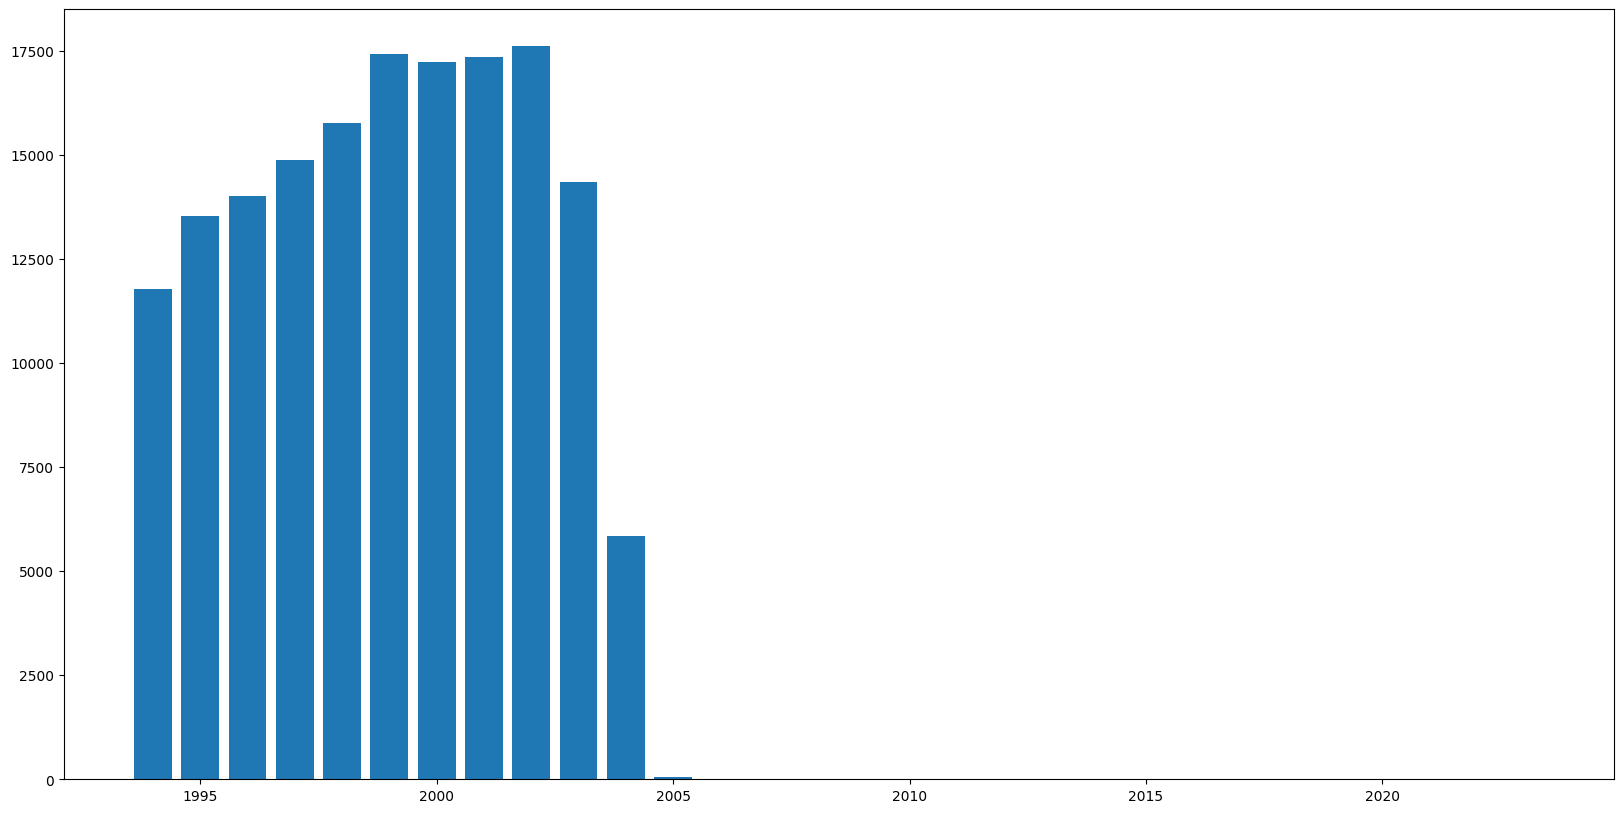

In [55]:
plt.figure(figsize=(20,10))
bars = plt.bar(x=books_year_rational.index,height=books_year_rational.values)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             '{:.0f}'.format(height), ha='center', va='bottom', rotation='90')
plt.show()


# Authors

In [56]:
books[books['Book-Author'].duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
62,0679865691,Haveli (Laurel Leaf Books),SUZANNE FISHER STAPLES,1995,Laurel Leaf,http://images.amazon.com/images/P/0679865691.0...,http://images.amazon.com/images/P/0679865691.0...,http://images.amazon.com/images/P/0679865691.0...
67,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...
74,0345465083,Seabiscuit,LAURA HILLENBRAND,2003,Ballantine Books,http://images.amazon.com/images/P/0345465083.0...,http://images.amazon.com/images/P/0345465083.0...,http://images.amazon.com/images/P/0345465083.0...
92,8445071769,El Senor De Los Anillos: Las DOS Torres (Lord ...,J. R. R. Tolkien,2001,Minotauro,http://images.amazon.com/images/P/8445071769.0...,http://images.amazon.com/images/P/8445071769.0...,http://images.amazon.com/images/P/8445071769.0...
93,8445071777,El Senor De Los Anillos: El Retorno Del Rey (T...,J. R. R. Tolkien,2001,Distribooks,http://images.amazon.com/images/P/8445071777.0...,http://images.amazon.com/images/P/8445071777.0...,http://images.amazon.com/images/P/8445071777.0...
...,...,...,...,...,...,...,...,...
271353,014002803X,Anti Death League,Kingsley Amis,1975,Viking Press,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...


In [57]:
# Lets find their number of books per author
# Number of unique authors
len(books['Book-Author'].unique())

102023

In [58]:
author_book_count = books['Book-Author'].value_counts()
author_book_count.head(20)

Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: Book-Author, dtype: int64

# Error in author name

In [ ]:
# Looks like there are a lot of books with no authors. So lets drop them for a while and count the rest

In [61]:
author_book_count = books[books['Book-Author']!= 'Not Applicable (Na )']
author_book_count_top50 = author_book_count.groupby('Book-Author').count()['Book-Title'].sort_values(ascending=False).head(50)
author_book_count_top50.head(10)

Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: Book-Title, dtype: int64

In [62]:
author_book_count = books[books['Book-Author']== 'Not Applicable (Na )']
print(author_book_count)

              ISBN                                         Book-Title  \
10821   068985918X      \Once More, With Feeling\" : The Script Book"   
12483   0752271474                         Purple Ronnie's Love Poems   
14045   0881762024  Campbell's Creative Cooking With Soup: Over 19...   
18533   0721401023                 Book of Trees (Nature, Series 536)   
18614   1566475961  Na Wahine: Hawaiin Proverbs &amp; Inspirationa...   
...            ...                                                ...   
268513  0805401466  Guideposts Best Loved Stories: A Treasury of G...   
268647  0895773767  Nature in America/Your A to Z Guide to Our Cou...   
269175  0812066170  Watercolor (Barron's Art Handbooks: Purple Ser...   
270639  0721407714           Hm the Queen (Famous People, Series 816)   
271066  0394884973  Walt Disney Pictures Presents the Great Mouse ...   

                 Book-Author  Year-Of-Publication  \
10821   Not Applicable (Na )                 2002   
12483   Not Appli

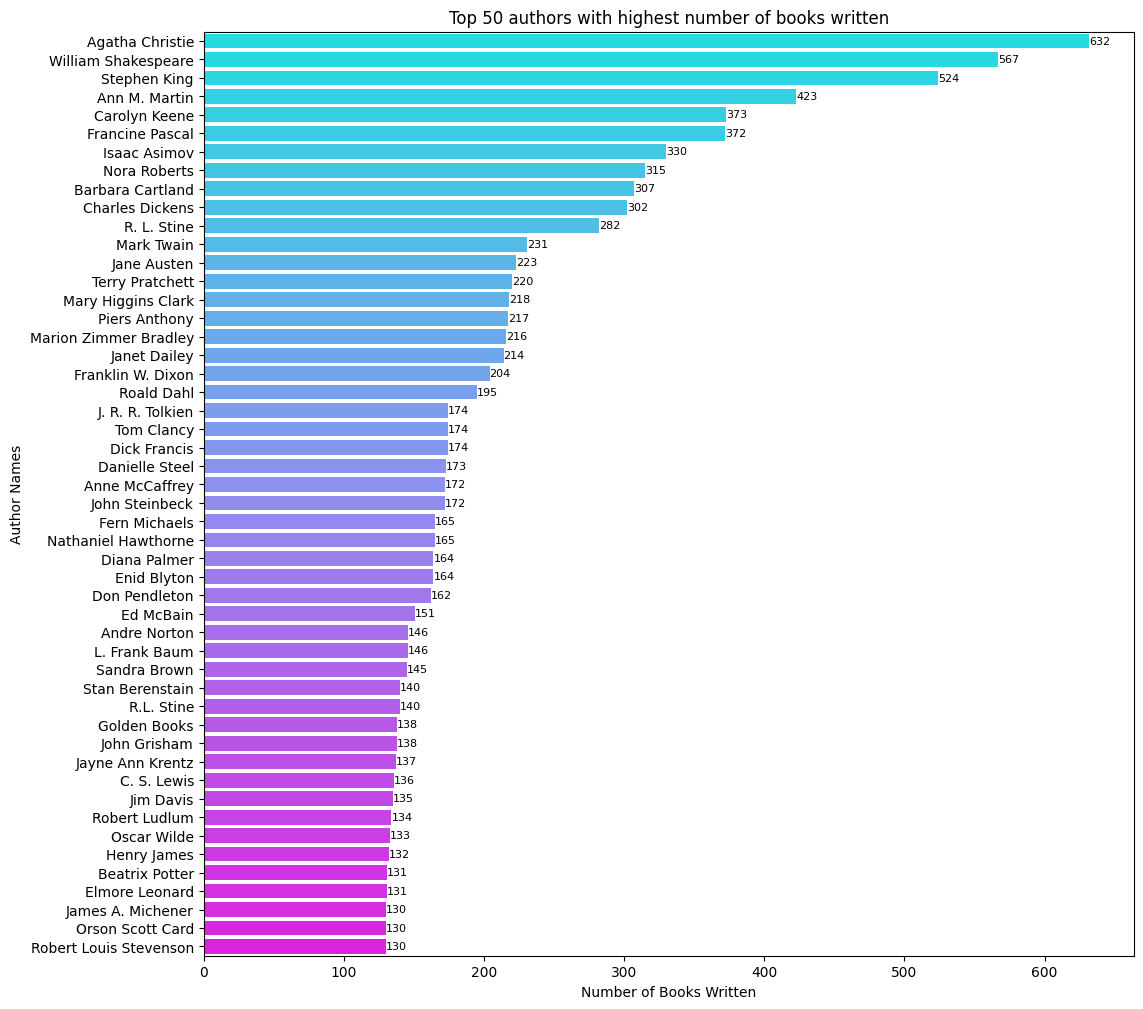

In [63]:
cool = sns.color_palette("cool", n_colors=len(author_book_count_top50.values))

plt.figure(figsize=(12, 12))

sns_plot = sns.barplot(y=author_book_count_top50.index,
                       x=author_book_count_top50.values, palette=cool, orient='h')

for i, value in enumerate(author_book_count_top50.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)

plt.ylabel("Author Names")
plt.xlabel("Number of Books Written")
plt.title("Top 50 authors with highest number of books written")
plt.show()

In [64]:
publishers = books['Publisher'].value_counts()
publishers

Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: Publisher, Length: 16804, dtype: int64

In [65]:
#repeating publisher
#how is can be helpful
#lets findout the greatest number of publisher for books
top_50_publishers = publishers.sort_values(ascending=False)[:51]
top_50_publishers

Harlequin                             7535
Silhouette                            4220
Pocket                                3905
Ballantine Books                      3783
Bantam Books                          3646
Scholastic                            3160
Simon &amp; Schuster                  2971
Penguin Books                         2844
Berkley Publishing Group              2771
Warner Books                          2727
Penguin USA                           2717
Harpercollins                         2525
Fawcett Books                         2258
Signet Book                           2070
Random House Inc                      2045
St Martins Pr                         1953
St. Martin's Press                    1783
Tor Books                             1704
HarperCollins Publishers              1700
Zebra Books                           1694
Bantam                                1660
Avon                                  1566
Jove Books                            1553
Vintage Boo